<a href="https://colab.research.google.com/github/cutiips/A-new-hope/blob/main/No11_LudovicMarquis_JonathanCurty_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importer les librairies

In [ ]:
# pour colab
!pip install -r https://raw.githubusercontent.com/cutiips/A-new-hope/main/requirements.txt > /dev/null 2>&1

# en local
# !pip install -r requirements.txt

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Importer les données

In [ ]:
# en local
# data = pd.read_csv("Data/titanic.csv")
data = pd.read_csv("https://raw.githubusercontent.com/cutiips/A-new-hope/main/Data/titanic.csv") # en ligne (colab)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Questions

## 1. Préparation des données

Remplissez la function `preprocess` ci-dessus. Celle-ci doit:
1. Supprimez les colonnes `PassengerId`, `Name`, `Ticket`, `Cabin`.
2. Supprimez les lignes contenant au moins une valeur manquante.
3. Créer une variable `FamilySize` qui est correspond à `SibSp` + `Parch` + 1. Supprimez les variables `SibSp` et `Parch`.
4. Recalculer le prix du billet `Fare` en divisant `Fare` par `FamilySize`.
5. Encoder les variables qualitatives `Sex`, `Embarked` avec l'argument `drop_first=True`.

In [ ]:
def preprocess(data: pd.DataFrame) -> pd.DataFrame:

    """La fonction prépare les données à l'analyse.

    Args:
        data (pd.DataFrame): La dataframe originale

    Returns:
        pd.DataFrame: La dataframe preprocessé et prête à être analysée.
    """

    # Faire une copy de la dataframe originale
    data_preprocessed = data.copy()

    # Supprimez les variables `PassengerId`, `Name`, `Ticket` & `Cabin`
    data_preprocessed = data_preprocessed.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

    # Supprimez lignes contenant au moins une valeur manquante
    data_preprocessed = data_preprocessed.dropna()

    # Créer une variable `FamilySize` et supprimez les variables `SibSp` et `Parch`
    data_preprocessed["FamilySize"] = data_preprocessed["SibSp"] + data_preprocessed["Parch"] + 1
    data_preprocessed = data_preprocessed.drop(columns=["SibSp", "Parch"])

    # Recalculer le prix du billet
    data_preprocessed["Fare"] = data_preprocessed["Fare"] / data_preprocessed["FamilySize"]

    # Encode (OHE) `Sex` & `Embarked`
    data_preprocessed = pd.get_dummies(data_preprocessed, columns=["Sex", "Embarked"], drop_first=True)


    # CHECK: NE PAS TOUCHER
    for col in ["PassengerId", "Name", "Ticket", "Cabin", "SibSp", "Parch"]:
        assert col not in data_preprocessed, f"{col} n'a pas été retiré."
    assert data_preprocessed.isna().sum().sum() == 0, "Il reste encore des NaN à supprimer."
    assert "FamilySize" in data_preprocessed.columns, "La colonne `FamilySize` n'a pas été créée."
    assert data_preprocessed.loc[0, "Fare"] == 3.625, "La colonne `Fare` n'a pas été recalculée."
    for col in [col for col in data_preprocessed if col.startswith("Embarked")]:
        assert data_preprocessed[col].nunique() == 2, f"{col} n'a pas été encodé."
    for col in [col for col in data_preprocessed if col.startswith("Sex")]:
        assert data_preprocessed[col].nunique() == 2, f"{col} n'a pas été encodé."

    return data_preprocessed

Le résultat de la function doit vous donner exactement le tableau ci-dessous.

In [ ]:
# Preprocess les données à l'aide de la function `preprocess`
data_clean = preprocess(data)
display(data_clean)

,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,3.625000,2,True,False,True
1,1,1,38.0,35.641650,2,False,False,False
2,1,3,26.0,7.925000,1,False,False,True
3,1,1,35.0,26.550000,2,False,False,True
4,0,3,35.0,8.050000,1,True,False,True
...,...,...,...,...,...,...,...,...
885,0,3,39.0,4.854167,6,False,True,False
886,0,2,27.0,13.000000,1,True,False,True
887,1,1,19.0,30.000000,1,False,False,True
889,1,1,26.0,30.000000,1,True,False,False


## 2. Inférence statistique (4 pts)

**Q1: L'âge moyen des passagers du Titanic est-il le même que l'âge moyen de la population en 1912 (28 ans)?**

***1. Identifier la ou les variables d’intérêt et spécifier le type***

La variable d'intérêt est l'âge des passagers du titanic. C'est une variable de type quantitative continue étant donné qu'elle mesure le temps écoulé depuis la naissance et peut être noté à n'importe quelle précision (jours, mois, années par exemple). Ses valeur admissibles ne sont pas dénombrables car il en existe une infinité.

***2. Réaliser une visualisation appropriée selon les variables***

Les visualisation appropriées pour représenter cette variable sont l'histogramme et le boxplot. Ils permettent de visualiser la distribution des valeurs.

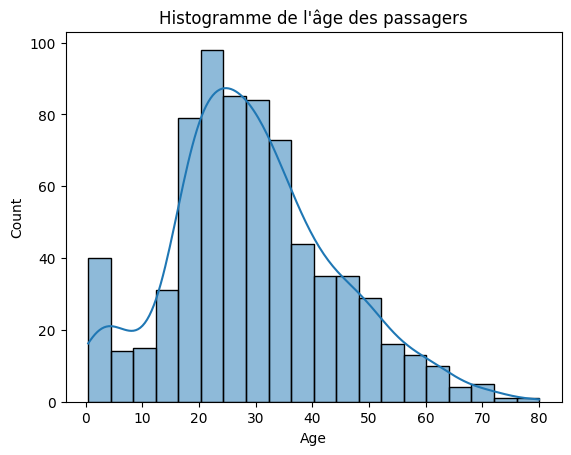

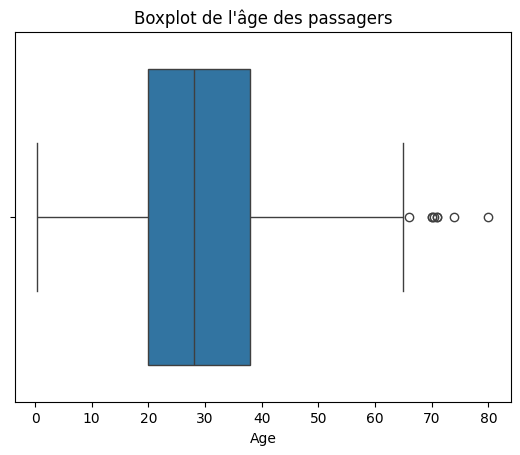

In [ ]:
sns.histplot(
    data=data_clean,
    x="Age",
    kde=True
)
plt.title("Histogramme de l'âge des passagers")
plt.show()

sns.boxplot(
    data=data_clean,
    x="Age"
)
plt.title("Boxplot de l'âge des passagers")
plt.show()

***3. Enoncer une hypothèse nulle et alternative***

- **H0 :** l'âge moyen des passagers du titanic est égal à l'âge moyen de la population en 1912 (μ = 28).

- **H1 :** l'âge moyen des passagers du titanic n'est pas égal à l'âge moyen de la population en 1912 (μ ≠ 28).

***4. Identifier le test statistique approprié***
  
Le test approprié est le `t-test` de Student car on procède à une comparaison entre la moyenne d'un échantillon (les passagers du titanic) à une valeur (la moyenne de la population en 1912), soit 28 ans.

Il est supposé que les données suivent la loi normale. Il est également justifié d'utiliser un `t-test` étant donné que l'échantillon est suffisamment grand (> 30).

***5. Vérifier la validation des postulats du t-test***

L'échantillon n'est pas réellement aléatoire car il correspond à une population spécifique, sélectionnée selon certains critères qu'il soit sociaux, économique ou historique. Ceci limite la généralisation des résultats à l'ensemble de la population de 1912.

Avec un échantillon de 712 passagers (> 30), nous pouvons postuler que, malgré une distribution pas optimale (voir histogramme), la validation des postulats du `t-test` peut tout de même être validé.

In [ ]:
n = len(data_clean)

print("La taille de l'échantillon est de : " + str(n))

La taille de l'échantillon est de : 712


***6. Calculer la statistique t et la p-valeur***

- Statistiques `t` = `3,02`
- `p-valeur` = `0.0026`

Selon les résultats de l'analyse, nous remarquons que la différence entre la moyenne observée et la moyenne hypothétique est grande.

Le résultat de la p-valeur signifie qu'il existe `0,26 %` de probabilité d'observer une si grande différence entre la moyenne de l'échantillon et 28 ans, si l'hypothèse nulle (`H0`) est vraie.

In [ ]:
ages = np.array(data_clean["Age"])

t, p_valeur = stats.ttest_1samp(ages, popmean=28)

print("La statistique t est de : " + str(t))
print("La p-valeur associée est de : " + str(p_valeur))

La statistique t est de : 3.0233009800374053
La p-valeur associée est de : 0.002590259537786662


***7. Prendre une décision selon la p-valeur (alpha 5%)***

La `p-valeur` étant `< 0,05`, le résultat du `t-test` est considéré comme statistiquement significatif au seuil alpha 5%.

Ainsi, cela nous permet de rejetter l'hypothèse nulle.

In [ ]:
alpha = 0.05

if p_valeur < alpha:
    print("Avec un seuil alpha", str(alpha), "on rejette l'hypothèse nulle.")
else:
    print("Avec un seuil alpha", str(alpha), "on ne rejette pas l'hypothèse nulle.")

Avec un seuil alpha 0.05 on rejette l'hypothèse nulle.


***8. Interpréter le résultat et évaluer la taille de l’effet***  
  
Les résultats nous montrent que l'âge moyen des passagers du titanic (29,64 ans) n'est pas égal à l'âge moyen de la population en 1912. Ces résultats sont statistiquement significatifs.

Toutefois, le test de Cohen (0,11) indique que l'ampleur de la différence est très faible sur le plan pratique.

Ainsi, bien qu'il y ait une différence son effet est faible.

In [ ]:
moyenne_ages = np.mean(ages)
ecart_type_ages = np.std(ages, ddof=1)
d_cohen = (moyenne_ages - 28) / ecart_type_ages

print("La moyenne des âges est de : " + str(moyenne_ages))
print("L'écart-type des âges est de : " + str(ecart_type_ages))
print("Le d de Cohen est de : " + str(d_cohen))

La moyenne des âges est de : 29.64209269662921
L'écart-type des âges est de : 14.49293290032352
Le d de Cohen est de : 0.11330299449551398


**Q2: La survie dépend-elle de la classe du passager?**

***1. Identifier la ou les variables d’intérêt et spécifier le type***

Les variables d'intérêts sont : les chances de survie des passagers (Survived) et la classe dans laquelle ils voyageaient (Pclass).

La première (Survived) est une variable de type qualitative nominale car elle est binaire et exprime une catégorie (mort ou survivant). La seconde (Pclass) est une variable **qualitative ordinale** car elle décrit une catégorie où il y a un ordre hiérarchique logique (1ère > 2ème > 3ème (prix, confort, prestige)).

***2. Réaliser une visualisation appropriée selon les variables***

La visualisation apropriée pour répondre à la question est le diagramme en barre groupées. Il permet de comparer les proportions de survivants et non survivants au sein de chaque classe.

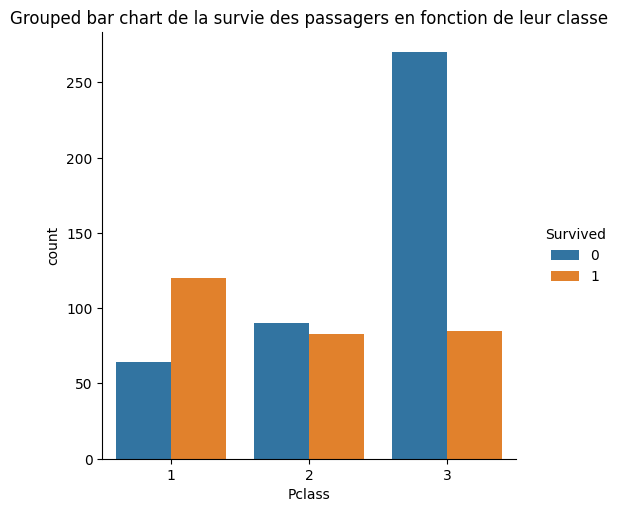

In [ ]:
sns.catplot(
    data=data_clean,
    x="Pclass",
    hue="Survived",
    kind="count"
)
plt.title("Diagramme en barre groupées de la survie des passagers en fonction de leur classe")
plt.show()

***3. Enoncer une hypothèse nulle et alternative***
- **H0 :** la survie du passager est indépendante de sa classe  
- **H1 :** la survie du passager n'est pas indépendante de sa classe

***4. Identifier le test statistique approprié***

Le test statistique approprié pour tester la relation entre deux variables **qualitatives** est le test du Chi-2 (`𝜒^2`).

***5. Vérifier la validation des postulats du test de 𝜒^2 d’indépendance***

L'application du Chi-2 (`𝜒^2`) est pertinente car les observations sont indépendantes. De plus, les effectifs attendus dans chaque case du tableau de contigence sont suffisamment grands (`>= 5`).

In [ ]:
tab_contingence = pd.crosstab(data_clean["Survived"], data_clean["Pclass"])

print(tab_contingence)


Pclass      1   2    3
Survived              
0          64  90  270
1         120  83   85


***6. Calculer la statistique et la p-valeur***

- Chi-2 = `91,08`
- `p-valeur` = `1,67e-20`

Selon les résultats de l'analyse, nous remarquons que la différence entre les effectifs observés et les effectifs attendus, si les deux variables étaient indépendantes, et très grandes.

Le résultat de la `p-valeur` est très faible. La probabilité d'observer une telle dépendance au sein d'un échantillon aléatoire est donc très petite, si on assume que l'hypothèse nulle (H0) est vraie.

In [ ]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(tab_contingence)

print("Chi-2 : " + str(chi2_stat))
print("La p-valeur est de : " + str(p_val))
print("Le degré de liberté est de : " + str(dof))
print("Les valeurs attendues sont : " + str(ex))

La statistique est de : 91.08074548791019
La p-valeur est de : 1.6675060315554636e-20
Le degré de liberté est de : 2
Les valeurs attendues sont : [[109.57303371 103.02247191 211.40449438]
 [ 74.42696629  69.97752809 143.59550562]]


***7. Prendre une décision selon la p-valeur (alpha 5%)***

La p-valeur étant très largement inférieure au seuil de 5%, le résultat du Chi-2 est considéré comme statistiquement significatif. Ainsi, cela nous permet de rejeter l'hypothèse nulle (H0).

In [ ]:
if p_val < alpha:
    print("Avec un seuil alpha", str(alpha), "on rejette l'hypothèse nulle.")
else:
    print("Avec un seuil alpha", str(alpha), "on ne rejette pas l'hypothèse nulle.")

Avec un seuil alpha 0.05 on rejette l'hypothèse nulle.


***8. Interpréter le résultat et évaluer la taille de l’effet***  

Les résultats nous montrent qu'il existe une dépendance statistiquement significative entre la classe du passager et sa survie (voir diagramme en barre groupées).

Le V de Cramer étant de 0,36, cela indique (selon l'étude de Amyotte, 2017) que l'intensité du lien entre les deux variables est très forte.

Ainsi, la classe dans laquelle le passager voyageait a eu un impact significatif et fort sur ses chances de survie.


Source : Amyotte (2017) - https://www.studocu.com/fr-ca/document/universite-de-montreal/introduction-aux-statistiques/aide-memoire-du-livre-stt1901/48217596

In [ ]:
v_cramer = np.sqrt(chi2_stat / (len(data_clean) * (min(tab_contingence.shape) - 1)))

print("Le V de Cramer est de : " + str(v_cramer))

Le V de Cramer est de : 0.35766240415815087


**Q3: Existe-t-il une différence d'âge entre les passagers qui ont survécu et les passagers décédés?**

***1. Identifier la ou les variables d’intérêt et spécifier le type***

Les variables d'intérêts sont l'âge (`Age`) et les chances de survie des passagers (`Survived`). Comme expliqué précédemment, l'âge est une variable **quantitative continue** et les chances de survie sont une variable de type **qualitative nominale**.


***2. Réaliser une visualisation appropriée selon les variables***

La visualisation appropriée pour répondre à la question est le boxplot des âges selon la variable `Survived` car il permet de comparer visuellement la distribution des âges dans chacun des groupes.  

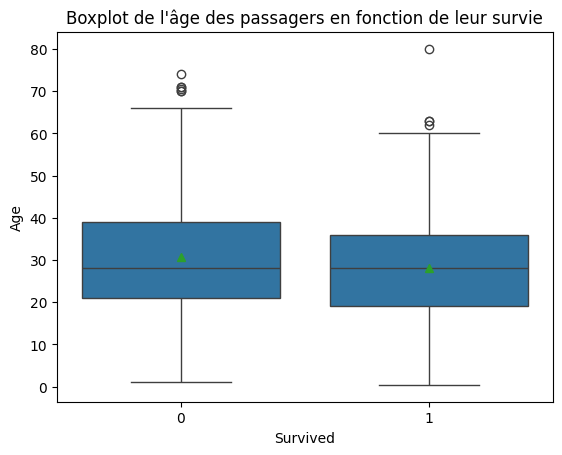

In [ ]:
sns.boxplot(
    data=data_clean,
    x="Survived",
    y="Age",
    showmeans=True
)
plt.title("Boxplot de l'âge des passagers en fonction de leur survie")
plt.show()

***3. Enoncer une hypothèse nulle et alternative***

- **H0 :** il n'existe pas de différence d'âges entre les passagers survivants et les passagers décédés.
- **H1 :** il existe une différence d'âges entre les passagers survivants et les passagers décédés.

***4. Identifier le test statistique approprié***
  
Le test approprié est le `t-test` de Student car il permet de comparer les moyennes d'âges des deux groupe qui sont indépendants.

Il est également justifié d'utiliser un `t-test` étant donné que la taille des deux groupes est suffisamment grande (> 30).

***5. Vérifier la validation des postulats du t-test à deux échantillons***

L'échantillon n'est pas réellement aléatoire car il correspond à une population spécifique, sélectionnée selon certains critères qu'il soit sociaux, économique ou historique. Ceci limite la généralisation des résultats à l'ensemble de la population de 1912.

La taille de l'échantillon des passagers n'ayant pas survécu est de `424` alors que la taille de l'échantillon des passagers ayant survécu est de `288`. Ainsi, chacun des échantillons est `> 30`.

In [ ]:
n_not_survived = len(data_clean[data_clean["Survived"] == 0])
n_survived = len(data_clean[data_clean["Survived"] == 1])

print("La taille de l'échantillon des passagers n'ayant pas survécu est de : " + str(n_not_survived))
print("La taille de l'échantillon des passagers ayant survécu est de : " + str(n_survived))

La taille de l'échantillon des passagers n'ayant pas survécu est de : 424
La taille de l'échantillon des passagers ayant survécu est de : 288


***6. Calculer la statistique et la p-valeur***

- Statistiques `t` = `2,18`
- `p-valeur` = `0.03`

Selon les résultats de l'analyse, nous remarquons qu'il existe une différence entre l'âge moyen des passagers survivants et des passagers décédés.

Le résultat de la p-valeur signifie que il y a environ 2,93% de probabilités d'observer une différence d'âge aussi marquée, entre survivants et non-survivants, par hasard si l'hypothèse nulle était vraie.

In [ ]:
ages_not_survived = np.array(data_clean[data_clean["Survived"] == 0]["Age"])
ages_survived = np.array(data_clean[data_clean["Survived"] == 1]["Age"])

t, p_valeur = stats.ttest_ind(
    ages_not_survived,
    ages_survived,
    alternative="two-sided",
    equal_var=False
)

print("La statistique t est de : " + str(t))
print("La p-valeur associée est de : " + str(p_valeur))

La statistique t est de : 2.184486214939826
La p-valeur associée est de : 0.02931497754601072


***7. Prendre une décision selon la p-valeur (alpha 5%)***

La `p-valeur` étant `< 0,05`, le résultat du `t-test` est considéré comme statistiquement significatif au seuil alpha 5%.

Ainsi, cela nous permet de rejetter l'hypothèse nulle, ce qui confirme qu'il y a une différence d'âge entre les deux échantillons.

In [ ]:
if p_valeur < alpha:
    print("Avec un seuil alpha", str(alpha), "on rejette l'hypothèse nulle.")
else:
    print("Avec un seuil alpha", str(alpha), "on ne rejette pas l'hypothèse nulle.")

Avec un seuil alpha 0.05 on rejette l'hypothèse nulle.


***8. Interpréter le résultat et évaluer la taille de l’effet***  

Les résultats montrent que la différence de moyenne d'âge entre les survivants (28,19 ans) et les morts (30,63 ans) est statistiquement significative. Toutefois, le test de Cohen (|-0,17|) indique que la taille de l'effet est faible. Ainsi, il y a une différence entre les deux moyennes d'âge mais cet effet sur les chances de survie semble faible.

In [ ]:
moyenne_ages_survived = np.mean(ages_survived)
moyenne_ages_not_survived = np.mean(ages_not_survived)
d_cohen = (moyenne_ages_survived - moyenne_ages_not_survived) / ecart_type_ages

print("La moyenne des âges des passagers ayant survécu est de : " + str(moyenne_ages_survived))
print("La moyenne des âges des passagers n'ayant pas survécu est de : " + str(moyenne_ages_not_survived))
print("L'écart-type des âges est de : " + str(ecart_type_ages))
print("Le d de Cohen est de : " + str(d_cohen))

La moyenne des âges des passagers ayant survécu est de : 28.19329861111111
La moyenne des âges des passagers n'ayant pas survécu est de : 30.62617924528302
L'écart-type des âges est de : 14.49293290032352
Le d de Cohen est de : -0.16786668722640677


**Q4: Existe-t-il une relation entre l'âge des passagers et le prix des billets?**

***1. Identifier la ou les variables d’intérêt et spécifier le type***
  
Les variables d'intérêts sont l'âge (`Age`) et le prix du billet (`Fare`). Comme expliqué précédemment, l'âge est une variable **quantitative continue**. De même, le prix du billet est également une variable **quantitative continue**, car il représente une quantité mesurable qui peut prendre n'importe quelle valeur.

***2. Réaliser une visualisation appropriée selon les variables***

Étant donné que nous cherchons à savoir s'il existe une relation entre deux variables quantitatives continues, la visualisation appropriée est le nuage de point (`scatter plot`).

L'axe `y` (`Fare`) est représenté en échelle logarithmique afin de mieux visualiser la répartition des prix en atténuant l'influence des billets très cher.

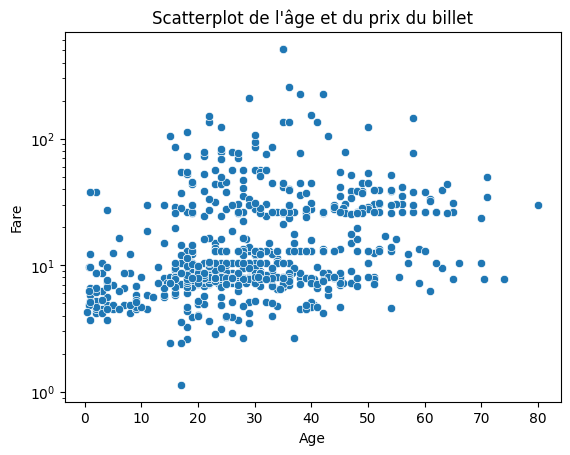

In [ ]:
sns.scatterplot(
    data=data_clean,
    x="Age",
    y="Fare"
)
plt.yscale("log")
plt.title("Scatter plot de l'âge et du prix du billet")
plt.show()

***3. Enoncer une hypothèse nulle et alternative***
- <b>H0</b> : il n'y a pas de corrélation entre l'âge des passagers et le prix du billet (𝜌 = 0)
- <b>H1</b> : il y a une corrélation significative entre l'âge des passagers et le prix du billet (𝜌 ≠ 0)

***4. Identifier le test statistique approprié***
  
Le test approprié dans ce cas là est un <b>t-test pour la corrélation</b>, étant donné qu'on a deux variables, que ces deux variables sont de type quantitative.

***5. Vérifier la validation des postulats du t-test pour la corrélation***
- Les données sont quantitatives mais l'échantillon n'est pas vraiment aléatoire, étant donné qu'il est constitué des passagers du Titanic, qui sont un sous-groupe spécifique de la population (personnes ayant les moyens d'acheter un billet de bâteau et l'envie)
- Le scatter plot ne montre aucune liaison
- Il y a certaines valeurs qui sont abberantes
- Les deux variables ne suivent pas une loi normale

Comme les postulats ne sont pas respectés, il n'y a pas de raison de poursuivre cette analyse, car les résultats ne voudront pas dire grand chose.

## 3. Data mining (2 pts)

**Q1: Effectuer une analyse statistique à l'aide de la régression logistique avec comme variable dépendente la variable `Survived`. Interpréter les coefficients et discuter de leur importance statistique en vous appuyant sur leur p-valeur.**

In [ ]:
print(data_clean.dtypes)

data_clean_reg_log = data_clean.astype({col: 'int' for col in data_clean.select_dtypes(include=['bool']).columns})

X = data_clean_reg_log.drop(columns=["Survived"])
y = data_clean_reg_log["Survived"]

Survived        int64
Pclass          int64
Age           float64
Fare          float64
FamilySize      int64
Sex_male         bool
Embarked_Q       bool
Embarked_S       bool
dtype: object


In [ ]:
model = sm.Logit(
    y,
    sm.add_constant(X)
)

model_fit = model.fit()

print(model_fit.summary())

Optimization terminated successfully.
         Current function value: 0.445519
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Wed, 18 Jun 2025   Pseudo R-squ.:                  0.3398
Time:                        05:19:03   Log-Likelihood:                -317.21
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 1.324e-66
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7251      0.659      8.691      0.000       4.434       7.016
Pclass        -1.1795      0.

In [ ]:
coefs = model_fit.params.tolist()

coefs

[5.725098601140174,
 -1.1794912526464787,
 -0.0418315463337772,
 0.0030104675944640324,
 -0.1934093875437263,
 -2.65474610140251,
 -0.8290537688375385,
 -0.4111051053739086]

In [ ]:
odds_ratio = np.exp(model_fit.params)

pd.DataFrame(odds_ratio, columns=["Odds Ratio"])

,Odds Ratio
const,306.463481
Pclass,0.307435
Age,0.959031
Fare,1.003015
FamilySize,0.824145
Sex_male,0.070317
Embarked_Q,0.436462
Embarked_S,0.662917


**Détails par variable**
  
***Pclass (coef = -1.1795, p=0.000, OR ≈ 0.31):***
- Sens : Un coefficient négatif de -1.1795 signifie que plus la classe (Pclass) augmente (i.e. passer de 1 → 2 → 3), plus la probabilité de survie diminue.
- Magnitude (odds ratio) : e^(-1.1795) ≈ 0.31. Autrement dit, si Pclass augmente de 1 unité (ex. de la 1ʳᵉ à la 2ᵉ classe, ou de la 2ᵉ à la 3ᵉ), les chances (odds) de survie sont multipliées par ~0.31 (soit diminuées d’environ 69%).
- Significativité : p=0.000, effet statistiquement très significatif.  
  
***Age (coef = -0.0418, p=0.000, OR ≈ 0.96):***
- Sens : Un coefficient négatif indique qu’à mesure que l’âge augmente, la probabilité de survie diminue légèrement.
- Magnitude : e^(-0.0418) ≈ 0.96, donc chaque année supplémentaire est associée à une réduction d’environ 4% des chances de survie (toutes choses égales par ailleurs).
- Significativité : p=0.000, effet statistiquement très significatif.  
  
***Fare (coef = 0.0030, p=0.457, OR ≈ 1.003):***
- Sens : Le coefficient est légèrement positif, mais pas significatif (p=0.457 > 0.05). On ne peut donc pas conclure que le prix du billet (Fare) exerce un effet notable sur la survie dans ce modèle, une fois les autres variables prises en compte.
- Magnitude : e^(0.0030) ≈ 1.003, ~0.3% d’augmentation des odds par unité supplémentaire de Fare, mais vu la p-valeur, cette estimation n’est pas jugée fiable/statistiquement significative.  
  
***FamilySize (coef = -0.1934, p=0.009, OR ≈ 0.82):***
- Sens : Coefficient négatif, donc plus la taille de la famille est grande, plus les chances de survie diminuent selon ce modèle.
- Magnitude : e^(-0.1934) ≈ 0.82, soit une baisse de ~18% des chances de survie par personne supplémentaire dans la famille.
- Significativité : p=0.009 (< 0.05), donc effet jugé significatif.  
  
***Sex_male (coef = -2.6547, p=0.000, OR ≈ 0.07):***
- Sens : Être un homme (Sex_male=1) diminue fortement la probabilité de survie (référence = femme).
- Magnitude : e^(-2.6547) ≈ 0.07, c’est-à-dire que les hommes ont ~93% de chances en moins (1 − 0.07 = 0.93) de survivre par rapport aux femmes, toutes choses égales par ailleurs.
- Significativité : p=0.000, effet hautement significatif.  
  
***Embarked_Q (coef = -0.8291, p=0.165, OR ≈ 0.44):***
- Sens : L’embarquement au port ‘Q’ a un coefficient négatif, mais la p-valeur (0.165) > 0.05.
- Conclusion : On ne peut pas conclure à un effet significatif de l’embarquement à ‘Q’ sur la survie.  
  
***Embarked_S (coef = -0.4111, p=0.128, OR ≈ 0.66):***  
- Sens : L’embarquement au port ‘S’ donne un coefficient négatif de -0.41, mais p=0.128 > 0.05.
- Conclusion : Pas de preuve statistique qu’embarquer à ‘S’ influe significativement sur les chances de survie, dans ce modèle.

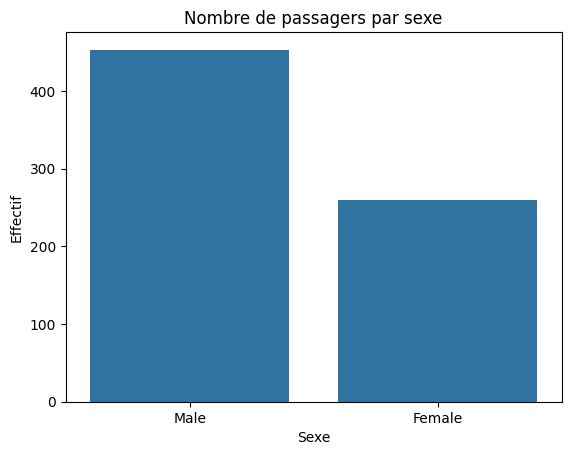

Male/Female ratio = 1.749034749034749


In [ ]:
# mappage pour plus de clarté
data_clean['Sex_label'] = data_clean['Sex_male'].map({True: 'Male', False: 'Female'})

# bar chart du nombre de passagers Male vs Female
sns.countplot(data=data_clean, x="Sex_label")
plt.title("Nombre de passagers par sexe")
plt.xlabel("Sexe")
plt.ylabel("Effectif")
plt.show()
#ratio d'homme pour chaque femme
print(
    "Male/Female ratio =",
    data_clean['Sex_male'].value_counts()[True] / data_clean['Sex_male'].value_counts()[False]
)

**Discussion**

***Sex_male (coef fortement négatif) :***  
Le fait d’être un homme sur le Titanic diminue fortement la probabilité de survie, et cela s’explique en partie par la règle tacite “Femmes et enfants d’abord.” D'ailleurs, et comme vu dans le graphe ci dessus, il est important de noter qu’il y avait environ 1,7 fois plus d’hommes que de femmes à bord (donc, pour chaque groupe de 10 femmes, on comptait 17 hommes). Dans un contexte où le nombre de places sur les canots de sauvetage était limité, cette proportion plus élevée de passagers masculins a sans doute amplifié la concurrence pour s’échapper. Ainsi, non seulement les hommes étaient souvent priés de laisser la priorité aux femmes et aux enfants, mais ils étaient également plus nombreux, ce qui renforce la probabilité que beaucoup d’entre eux se retrouvent sans place sur les canots.  
  
***Pclass (négatif) :***  
Plus la classe est élevée (1ère classe), meilleures sont les chances de survie. Les passagers de 3ème classe ont souvent été logés dans des ponts plus bas, avec un accès plus compliqué aux canots de sauvetage (https://courses.bowdoin.edu/history-2203-fall-2020-kmoyniha/reflection/). La variable Pclass capture donc le déséquilibre dans les opportunités de fuite, l’accès à l’information et à la proximité des canots.

***Age (négatif) :***  
Plus on vieillit, moins on a la force ou l’agilité pour se frayer un chemin vers les canots. Par ailleurs, si l’on observe que les plus jeunes survivent davantage, cela peut venir du fait qu’on ait effectivement privilégié les “enfants” dans le sauvetage. Ce résultat nuance le “Femmes et enfants d’abord” pour les plus âgés, qui ont peut-être eu moins de capacité ou de chances de s’en sortir.

***FamilySize (négatif) :***  
Un effet parfois inattendu, mais dans un scénario dramatique comme le Titanic, voyager en famille nombreuse pouvait paradoxalement réduire les chances de survie. On pourrait imaginer qu’une personne tentant de secourir plusieurs proches ralentit sa propre évacuation. Par exemple, un père de famille qui essaie de réunir sa femme (ou son homme!!!) et quatre enfants est susceptible de perdre un temps précieux, voire de se sacrifier pour en sauver un maximum.

**Q2: Effectuer une analyse statistique à l'aide d'un arbre de classification avec comme variable dépendente la variable `Survived` et une profondeur maximale de 4. Visualiser l'arbre et expliquer quelques décisions.**

In [ ]:
model = DecisionTreeClassifier(max_depth=4)

model_fit = model.fit(X, y)

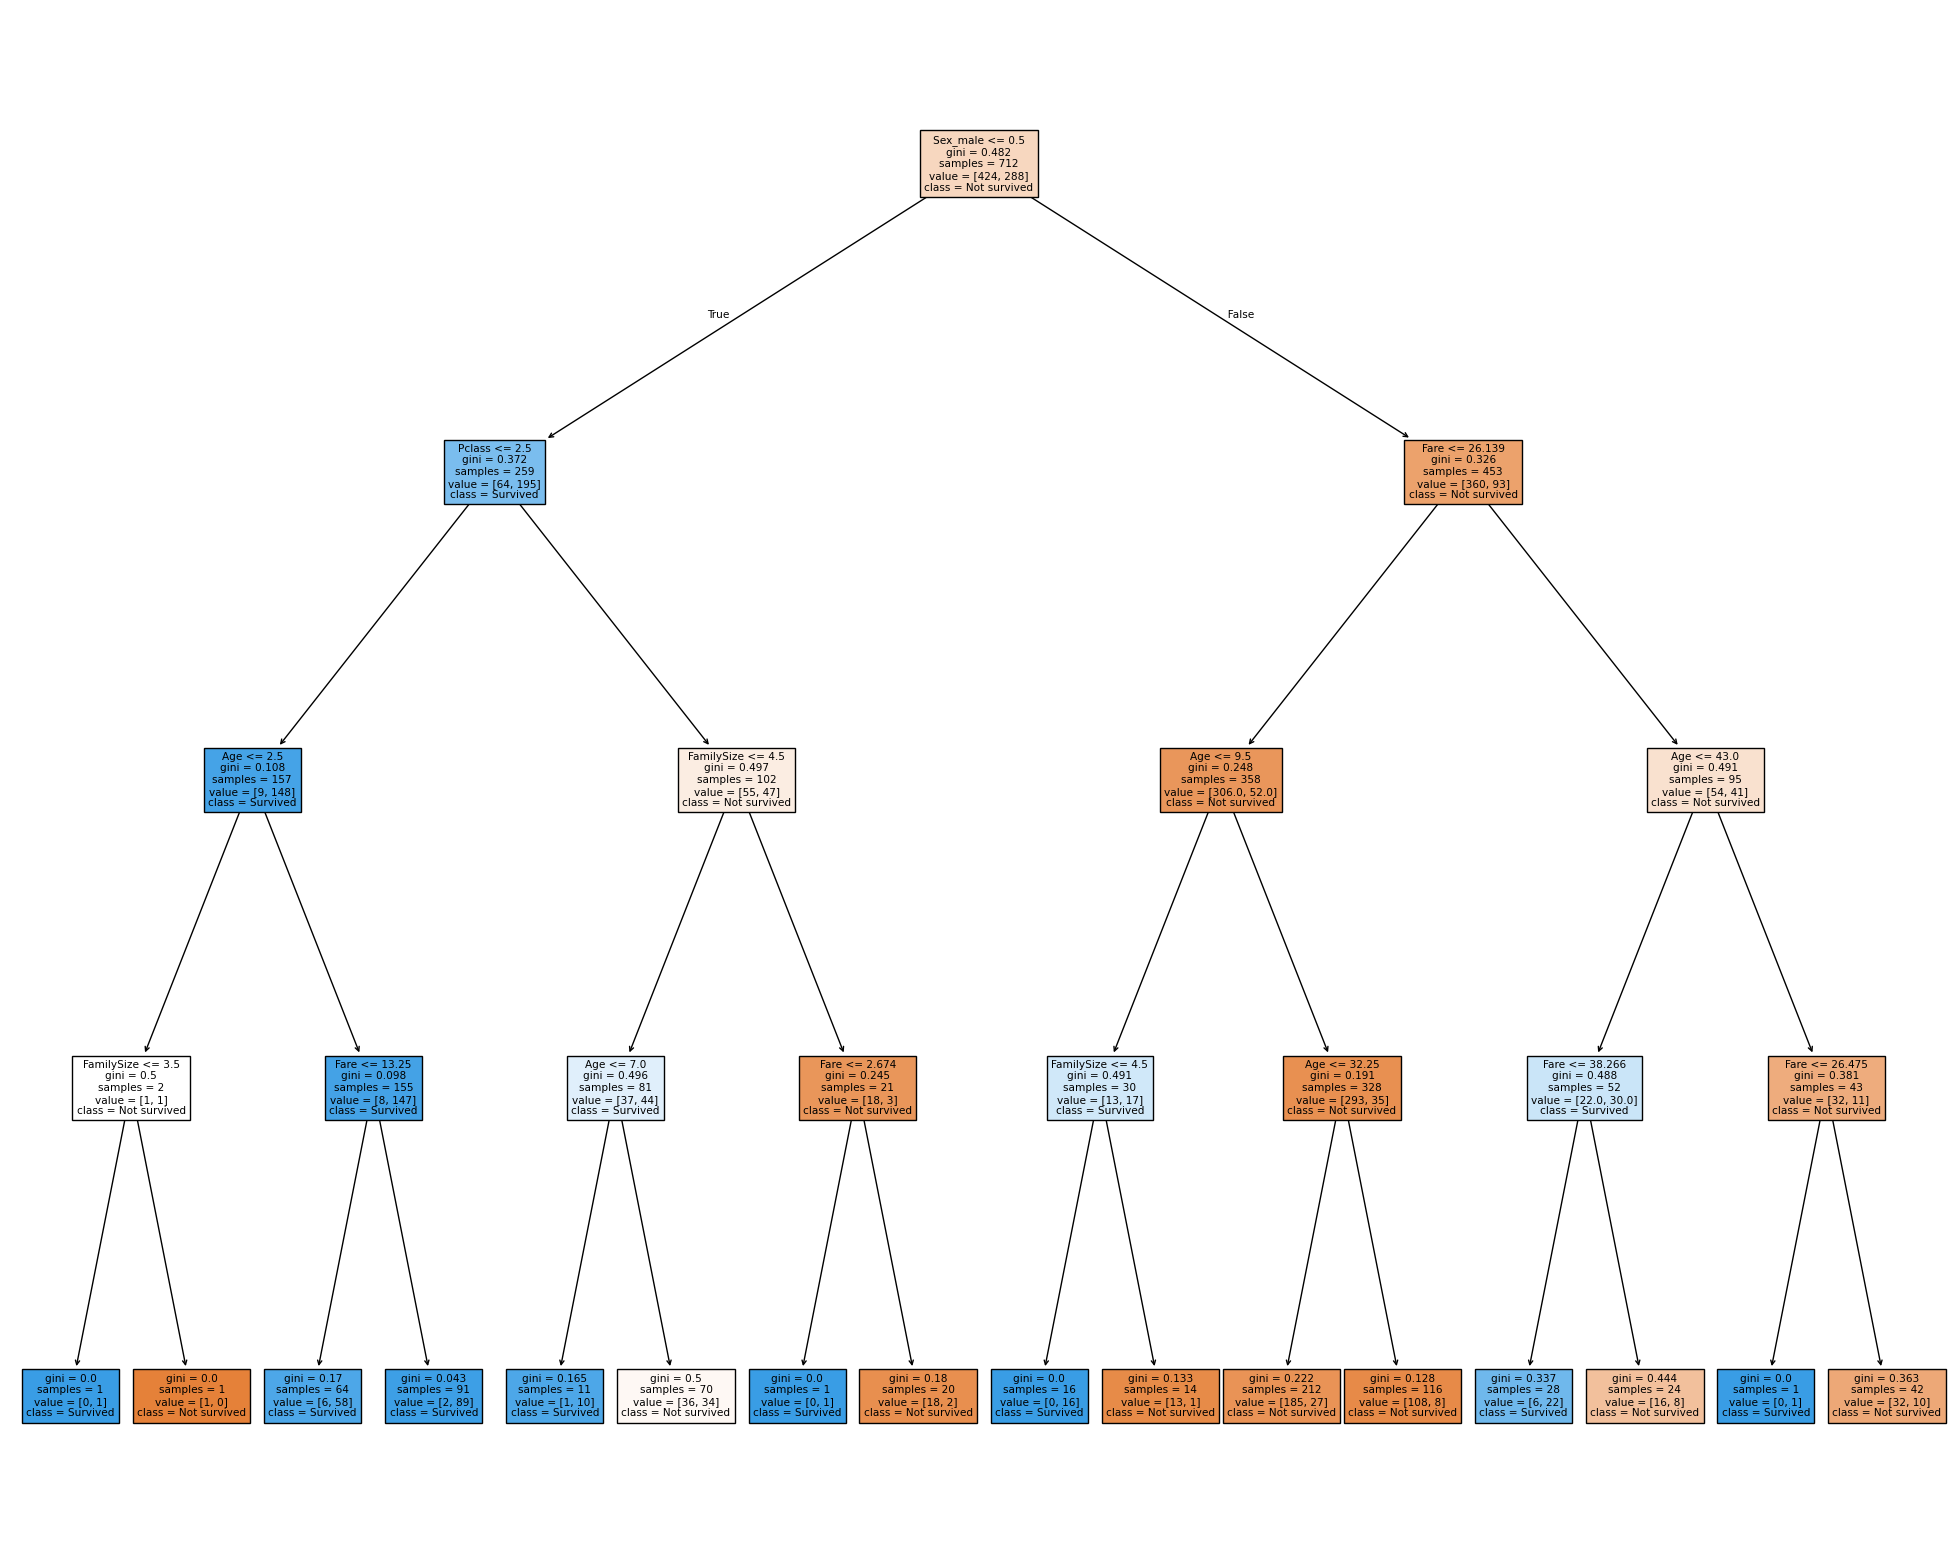

In [ ]:
fig = plt.figure(figsize=(25, 20))
_ = plot_tree(
    model,
    feature_names=X.columns.tolist(),
    class_names=["Not survived", "Survived"],
    filled=True
)

***Racine :***

La toute première question est : Sex_male <= 0.5?

Si la réponse est “True” (donc Sex_male=0, c’est-à-dire une femme), on part vers la branche de gauche.

Si c’est “False” (donc Sex_male=1, un homme), on va vers la branche de droite.

C’est cohérent avec l’importance de la variable “Sexe” dans la survie : l’arbre sépare tout de suite femmes et hommes.

***Branche “Femmes” (gauche), 2ᵉ question : Pclass <= 2.5?***

Si “Oui” (première ou deuxième classe), on continue le sous-arbre (encore à gauche) où l’on affine sur l’Âge ou Fare.

Si “Non” (troisième classe), on aboutit à une autre sous-branche.

Cette décision indique que chez les femmes, être en 1ʳᵉ/2ᵉ classe versus en 3ᵉ classe est un critère majeur pour la survie.

***Exemple de nœud plus bas : Age <= 2.5 (femmes, 1ʳᵉ/2ᵉ classe).***

Si “Oui” (donc Age ≤ 2,5 ans !), il s’agit d’enfants en très bas âge : presque tous survivent (le nœud final est “Survived”).

Si “Non”, l’arbre regarde parfois Fare <= 13.2 ou d’autres variables pour départager.

On voit ici le fameux “Femmes et enfants d’abord”, avec un taux de survie encore plus élevé si l’enfant est vraiment jeune.

***Branche “Hommes” (droite), 2ᵉ question : Fare <= 26.159***

Pour les hommes ayant payé un billet peu cher (moins de ~26 £), on va sur la branche de gauche, autrement on descend à droite où on teste ensuite Age, FamilySize, etc.

Cela reflète l’idée qu’un homme en 3ᵉ classe (ou billet bon marché) est souvent dans une situation défavorable ; l’arbre affine ensuite selon l’âge ou la taille de la famille.

***Exemple de feuille :***
on voit par exemple une feuille notée “class = Survived” avec un certain nombre d’observations, par exemple si Sex_male=0.5 (femme), Pclass <= 2.5, Age <= 2.5, etc. Ce nœud final indique qu’une très large majorité des observations sur ce chemin ont survécu, donc l’arbre les classe comme “Survived”.

***FamilySize <= 4.5 apparaît aussi :***

L’arbre juge qu’au-delà d’une famille de plus de 4 ou 5 personnes, les chances de survie sont moindres (dans plusieurs branches). On voit donc que chez des hommes ou femmes avec un FamilySize élevé, l’arbre tend à prédire “Not Survived”.

En résumé, l’arbre hiérarchise ainsi : d’abord le sexe (variable la plus discriminante), puis la classe et le prix du billet, puis l’âge (avec un effet très marqué pour les tout-petits), et enfin la taille de la famille. Chaque chemin aboutit à une décision (Survived / Not Survived) en fonction du nœud terminal.